## Evaluating Pre-Trained CNN model
<br>
<br>

In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT))

In [2]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import pandas as pd
import numpy as np
from pathlib import Path
import os
from scripts import engine,predictions,train
import matplotlib.pyplot as plt
from src.models import resnet,vgg
from src.data import dataloaders,transforms
from src.utils import visualisations,save_model

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
BATCH_SIZE = 32
LEARNING_RATE = 1e-3
NUM_WORKERS = os.cpu_count()
EPOCHS = 10

## ResNet-50

In [7]:
ResNet50, resnet50_eval_transforms = resnet.resnet50(num_classes=10)

In [8]:
resnet50_eval_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [9]:
train_dir = "../data/Galaxy10_DECaLS/train"
val_dir = "../data/Galaxy10_DECaLS/val"
test_dir = "../data/Galaxy10_DECaLS/test"

train_loader, val_loader, test_loader, class_names= dataloaders.create_dataloaders(train_dir=train_dir, 
                                                                        test_dir=test_dir,
                                                                        val_dir=val_dir,
                                                                        num_workers=NUM_WORKERS,
                                                                        train_transform=transforms.get_train_transforms(resize_size=256,crop_size=224),
                                                                        eval_transform=resnet50_eval_transforms,
                                                                        batch_size=BATCH_SIZE)

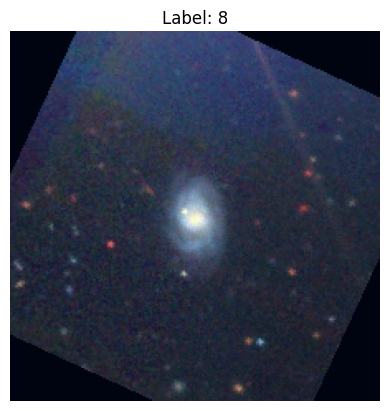

In [10]:
import matplotlib.pyplot as plt

# Get one batch
img_batch, label_batch = next(iter(train_loader))

# Pick first sample
img = img_batch[0]
label = label_batch[0]

# If tensor is normalized, bring it back to [0, 1] for visualization
img = img.permute(1, 2, 0).cpu()

img = img - img.min()
img = img / img.max()

plt.imshow(img)
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()


In [11]:
optimizer = torch.optim.Adam(params=ResNet50.parameters(),lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

In [12]:
resnet50_results = engine.train(model=ResNet50,
                                optimizer=optimizer,
                                loss_fn=loss_fn,
                                device=device,
                                epochs=EPOCHS,
                                train_dataloader=train_loader,
                                test_dataloader=val_loader,
                                validation=True)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.7421 | train_acc: 0.3977 | val_loss: 1.5684 | val_acc: 0.4602
Epoch: 2 | train_loss: 1.5085 | train_acc: 0.4733 | val_loss: 1.4888 | val_acc: 0.4678
Epoch: 3 | train_loss: 1.4459 | train_acc: 0.4854 | val_loss: 1.4560 | val_acc: 0.4821
Epoch: 4 | train_loss: 1.4177 | train_acc: 0.4958 | val_loss: 1.4016 | val_acc: 0.5163
Epoch: 5 | train_loss: 1.3935 | train_acc: 0.5027 | val_loss: 1.3872 | val_acc: 0.5131
Epoch: 6 | train_loss: 1.3836 | train_acc: 0.5036 | val_loss: 1.3720 | val_acc: 0.5231
Epoch: 7 | train_loss: 1.3832 | train_acc: 0.5042 | val_loss: 1.3485 | val_acc: 0.5296
Epoch: 8 | train_loss: 1.3666 | train_acc: 0.5120 | val_loss: 1.3462 | val_acc: 0.5429
Epoch: 9 | train_loss: 1.3680 | train_acc: 0.5141 | val_loss: 1.3272 | val_acc: 0.5525
Epoch: 10 | train_loss: 1.3602 | train_acc: 0.5077 | val_loss: 1.3417 | val_acc: 0.5479


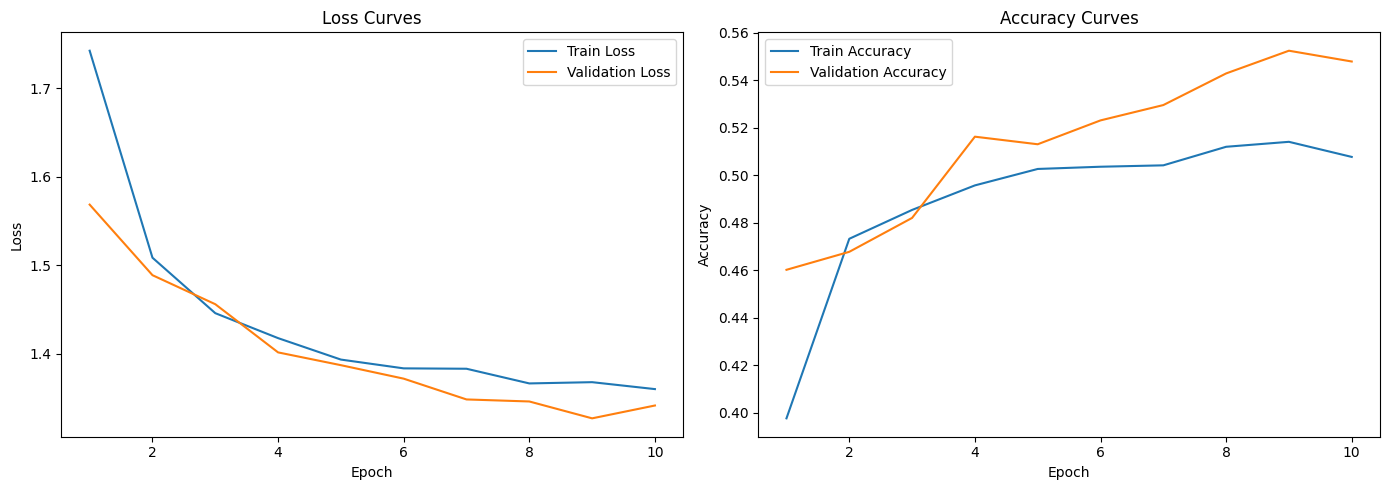

In [13]:
visualisations.plot_acc_loss_curves(results=resnet50_results,validation=True)

In [ ]:
# save_model.save_model(model=ResNet50,model_name="Resnet50_10_epochs_trainable_classifier.pth",base_dir='checkpoints')

[INFO] Saving model to: ../checkpoints/resnet50/Resnet50_10_epochs_trainable_classifier.pth


In [ ]:
# ResNet50, _ = resnet.resnet50(num_classes=10)

# ResNet50.load_state_dict(torch.load(f="../checkpoints/resnet50/Resnet50_10_epochs_trainable_classifier.pth"))

<All keys matched successfully>

In [26]:
test_results = predictions.test_model(model=ResNet50,
                       test_dataloader=test_loader,
                       device=device)

print(f"Test accuracy : {test_results["test_accuracy"]:.4f}")
print(f"Test loss : {test_results["test_loss"]:.4f}")

Test accuracy : 0.5135
Test loss : 1.4031


In [ ]:
len(test_results["predictions"])

1774

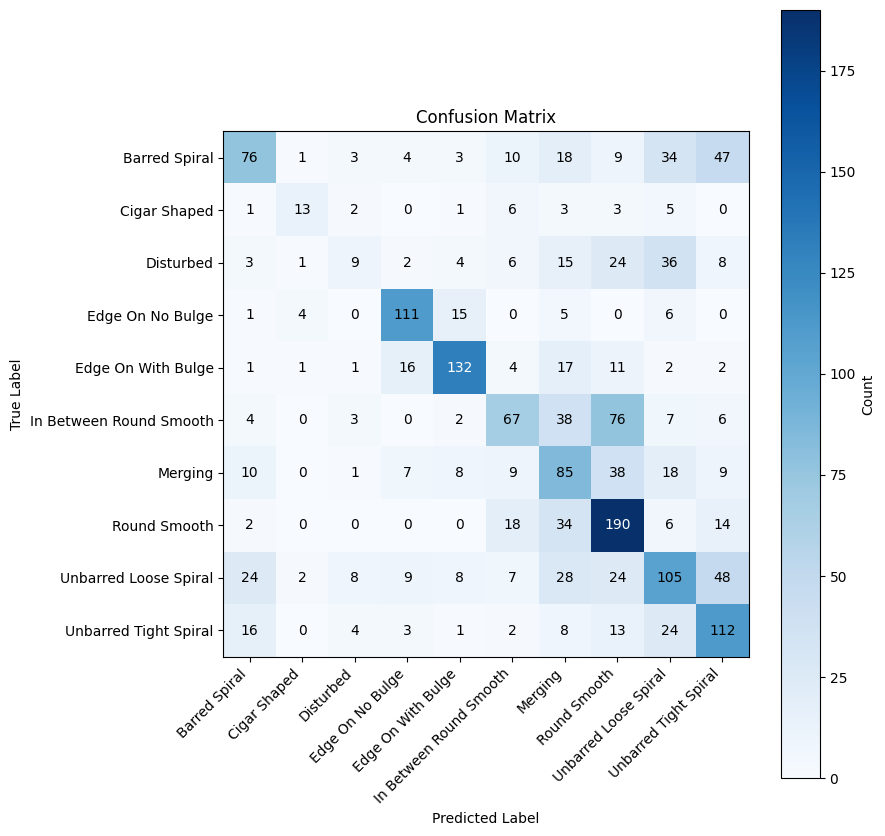

In [16]:
predictions.plot_confusion_matrix(labels=test_results["labels"],
                                  predictions=test_results["predictions"],
                                  class_names=class_names,
                                  normalize=False)

<br>

## ResNet26

In [7]:
ResNet26, resnet26_eval_transforms = resnet.resnet26(num_classes=10)

In [8]:
resnet26_eval_transforms

Compose(
    Resize(size=256, interpolation=bicubic, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    MaybeToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)

In [9]:
train_dir = "../data/Galaxy10_DECaLS/train"
val_dir = "../data/Galaxy10_DECaLS/val"
test_dir = "../data/Galaxy10_DECaLS/test"

train_loader, val_loader, test_loader, class_names= dataloaders.create_dataloaders(train_dir=train_dir, 
                                                                        test_dir=test_dir,
                                                                        val_dir=val_dir,
                                                                        num_workers=NUM_WORKERS,
                                                                        train_transform=transforms.get_train_transforms(resize_size=256,crop_size=224),
                                                                        eval_transform=resnet26_eval_transforms,
                                                                        batch_size=BATCH_SIZE)

In [10]:
optimizer = torch.optim.Adam(params=ResNet26.parameters(),lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

In [11]:
resnet26_results = engine.train(model=ResNet26,
                                optimizer=optimizer,
                                loss_fn=loss_fn,
                                device=device,
                                epochs=EPOCHS,
                                train_dataloader=train_loader,
                                test_dataloader=val_loader,
                                validation=True)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.5267 | train_acc: 0.4553 | val_loss: 1.4596 | val_acc: 0.4875
Epoch: 2 | train_loss: 1.3545 | train_acc: 0.5132 | val_loss: 1.4349 | val_acc: 0.4984
Epoch: 3 | train_loss: 1.3183 | train_acc: 0.5279 | val_loss: 1.4346 | val_acc: 0.4904
Epoch: 4 | train_loss: 1.3051 | train_acc: 0.5296 | val_loss: 1.4044 | val_acc: 0.5044
Epoch: 5 | train_loss: 1.2998 | train_acc: 0.5339 | val_loss: 1.4178 | val_acc: 0.4880
Epoch: 6 | train_loss: 1.2782 | train_acc: 0.5432 | val_loss: 1.3960 | val_acc: 0.5122
Epoch: 7 | train_loss: 1.2807 | train_acc: 0.5376 | val_loss: 1.3604 | val_acc: 0.5108
Epoch: 8 | train_loss: 1.2716 | train_acc: 0.5403 | val_loss: 1.4576 | val_acc: 0.4724
Epoch: 9 | train_loss: 1.2797 | train_acc: 0.5434 | val_loss: 1.3803 | val_acc: 0.5112
Epoch: 10 | train_loss: 1.2731 | train_acc: 0.5450 | val_loss: 1.3415 | val_acc: 0.5219


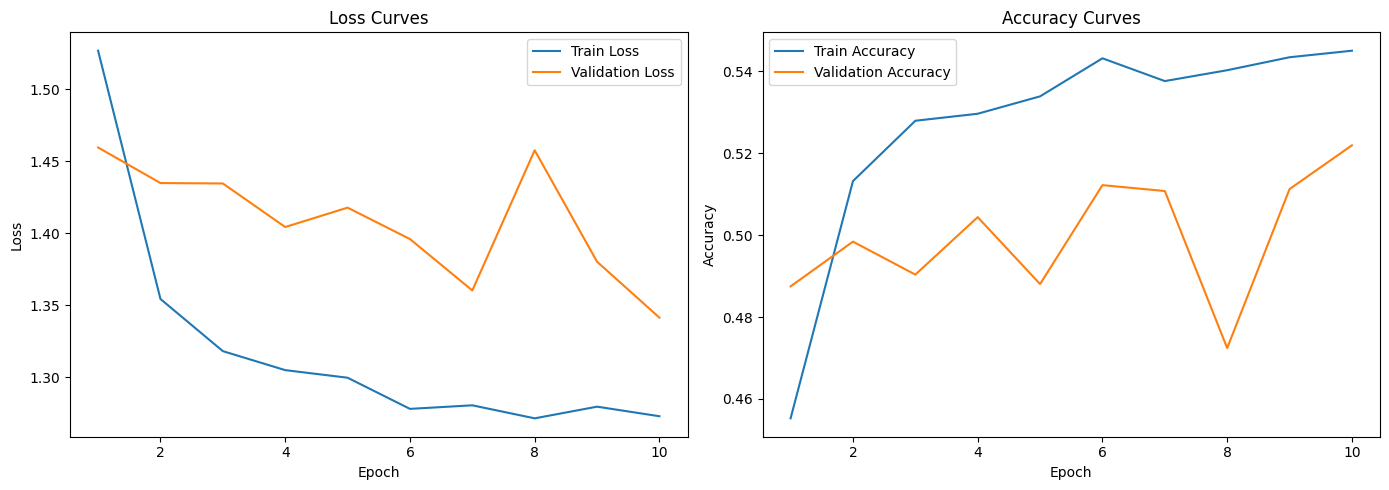

In [12]:
visualisations.plot_acc_loss_curves(results=resnet26_results,validation=True)

In [13]:
test_results = predictions.test_model(model=ResNet26,
                       test_dataloader=test_loader,
                       device=device)

print(f"Test accuracy : {test_results["test_accuracy"]:.4f}")
print(f"Test loss : {test_results["test_loss"]:.4f}")

Test accuracy : 0.5045
Test loss : 1.3673


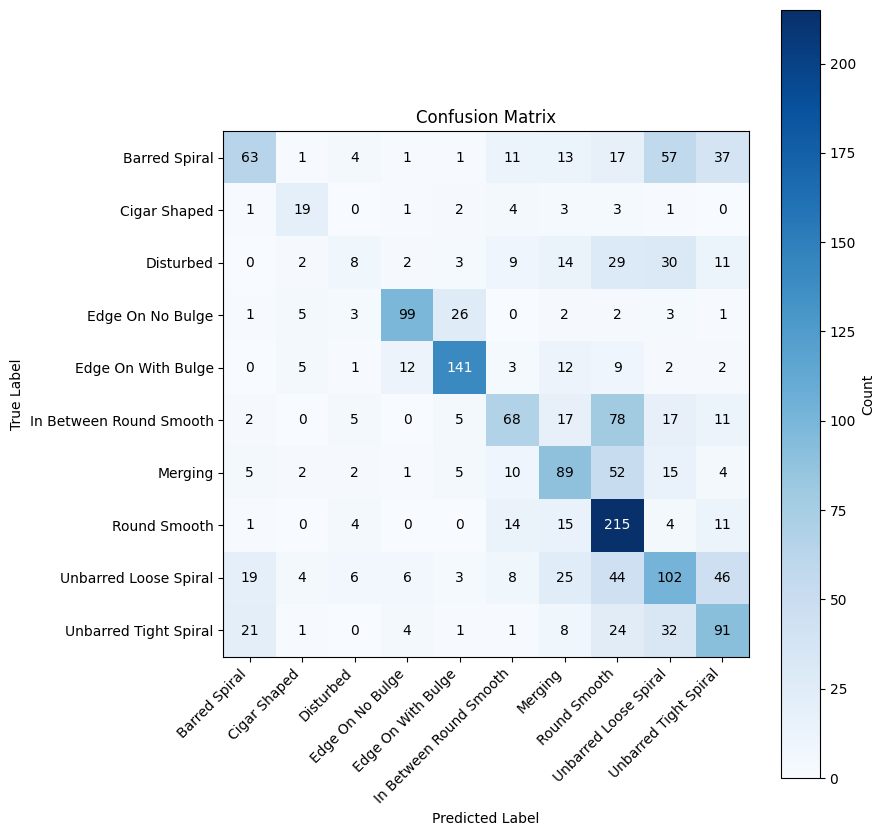

In [14]:
predictions.plot_confusion_matrix(labels=test_results["labels"],
                                  predictions=test_results["predictions"],
                                  class_names=class_names,
                                  normalize=False)

In [15]:
save_model.save_model(model=ResNet26,model_name="Resnet26_10_epochs_trainable_classifier.pth",base_dir='checkpoints')

[INFO] Saving model to: ../checkpoints/resnet26/Resnet26_10_epochs_trainable_classifier.pth


<br>

## VGG16

In [5]:
Vgg16, vgg16_eval_transforms = vgg.vgg16(num_classes=10)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/asus/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [02:43<00:00, 3.39MB/s] 


In [16]:
vgg16_eval_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [17]:
train_dir = "../data/Galaxy10_DECaLS/train"
val_dir = "../data/Galaxy10_DECaLS/val"
test_dir = "../data/Galaxy10_DECaLS/test"

train_loader, val_loader, test_loader, class_names= dataloaders.create_dataloaders(train_dir=train_dir, 
                                                                        test_dir=test_dir,
                                                                        val_dir=val_dir,
                                                                        num_workers=NUM_WORKERS,
                                                                        train_transform=transforms.get_train_transforms(resize_size=256,crop_size=224),
                                                                        eval_transform=vgg16_eval_transforms,
                                                                        batch_size=BATCH_SIZE)

In [18]:
optimizer = torch.optim.Adam(params=Vgg16.parameters(),lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

In [19]:
vgg16_results = engine.train(model=Vgg16,
                                optimizer=optimizer,
                                loss_fn=loss_fn,
                                device=device,
                                epochs=EPOCHS,
                                train_dataloader=train_loader,
                                test_dataloader=val_loader,
                                validation=True)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.6784 | train_acc: 0.3971 | val_loss: 1.3670 | val_acc: 0.4939
Epoch: 2 | train_loss: 1.4209 | train_acc: 0.4797 | val_loss: 1.3032 | val_acc: 0.5396
Epoch: 3 | train_loss: 1.3395 | train_acc: 0.5109 | val_loss: 1.2196 | val_acc: 0.5604
Epoch: 4 | train_loss: 1.3040 | train_acc: 0.5278 | val_loss: 1.3327 | val_acc: 0.5124
Epoch: 5 | train_loss: 1.2747 | train_acc: 0.5384 | val_loss: 1.1658 | val_acc: 0.6004
Epoch: 6 | train_loss: 1.2616 | train_acc: 0.5471 | val_loss: 1.1867 | val_acc: 0.5891
Epoch: 7 | train_loss: 1.2376 | train_acc: 0.5558 | val_loss: 1.1994 | val_acc: 0.5902
Epoch: 8 | train_loss: 1.2208 | train_acc: 0.5581 | val_loss: 1.1809 | val_acc: 0.5835
Epoch: 9 | train_loss: 1.2230 | train_acc: 0.5573 | val_loss: 1.1579 | val_acc: 0.5922
Epoch: 10 | train_loss: 1.2085 | train_acc: 0.5688 | val_loss: 1.1933 | val_acc: 0.5796


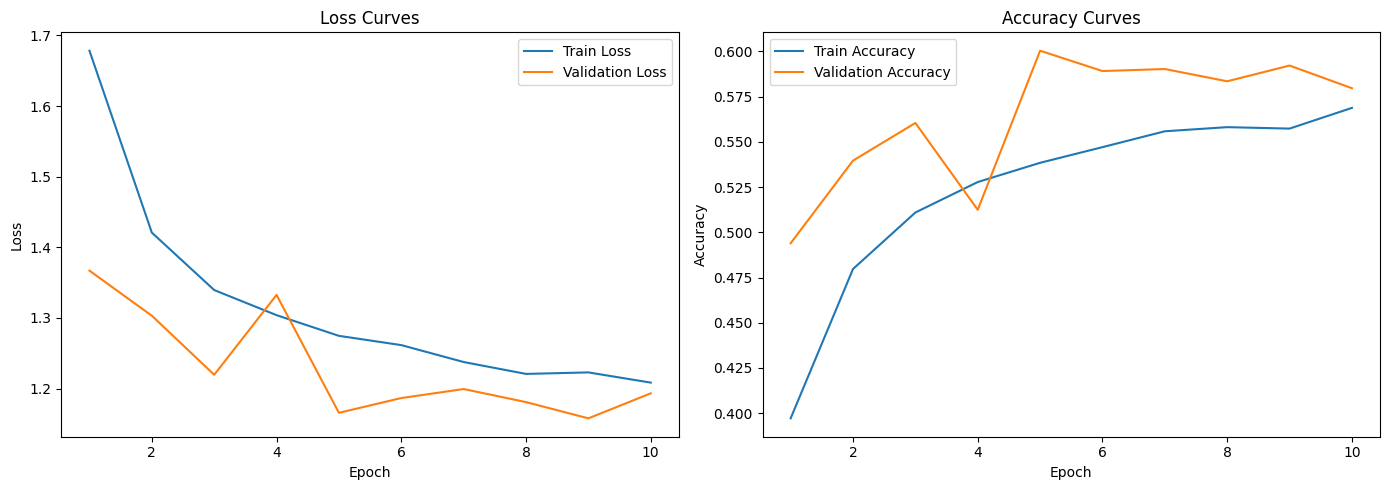

In [20]:
visualisations.plot_acc_loss_curves(results=vgg16_results,validation=True)

In [21]:
test_results = predictions.test_model(model=Vgg16,
                       test_dataloader=test_loader,
                       device=device)

print(f"Test accuracy : {test_results["test_accuracy"]:.4f}")
print(f"Test loss : {test_results["test_loss"]:.4f}")

Test accuracy : 0.5547
Test loss : 1.2131


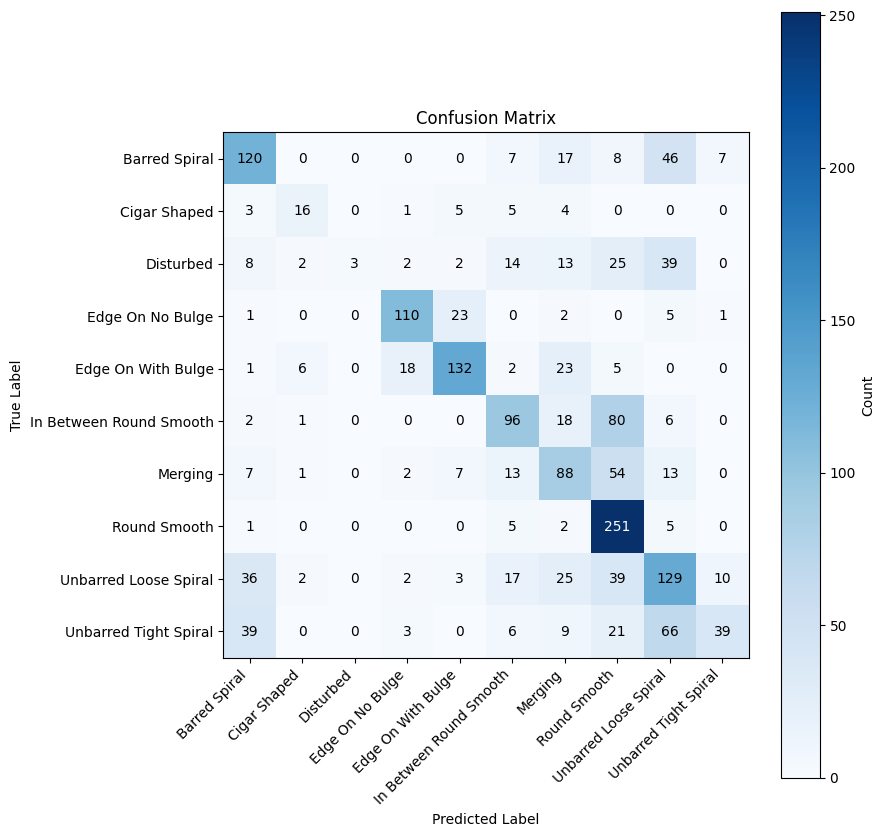

In [22]:
predictions.plot_confusion_matrix(labels=test_results["labels"],
                                  predictions=test_results["predictions"],
                                  class_names=class_names,
                                  normalize=False)

In [23]:
save_model.save_model(model=ResNet26,model_name="VGG16_10_epochs_trainable_classifier.pth",base_dir='checkpoints')

[INFO] Saving model to: ../checkpoints/vgg16/VGG16_10_epochs_trainable_classifier.pth
